In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
df = pd.read_csv ("Seed_Data.csv")

In [4]:
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
A         210 non-null float64
P         210 non-null float64
C         210 non-null float64
LK        210 non-null float64
WK        210 non-null float64
A_Coef    210 non-null float64
LKG       210 non-null float64
target    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [7]:
df.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


/home/unbeatable/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


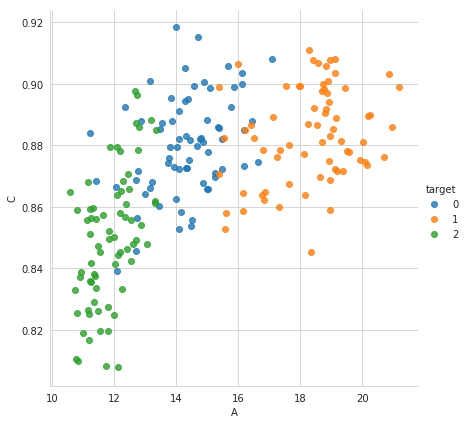

In [12]:
sns.lmplot ( "A" , "C" , data = df , hue = "target" , fit_reg = False , size = 6)

/home/unbeatable/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


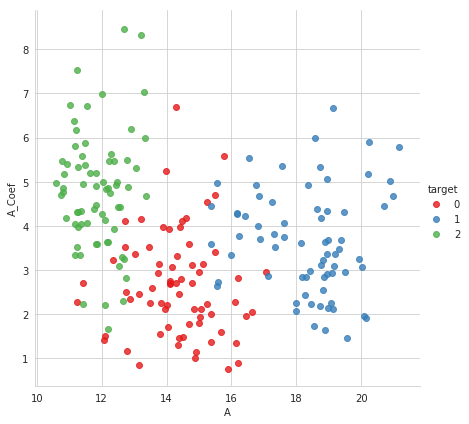

In [16]:
 sns.lmplot ("A" , "A_Coef" , data = df , hue = "target" , palette = "Set1" , size = 6 , fit_reg = False)

/home/unbeatable/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


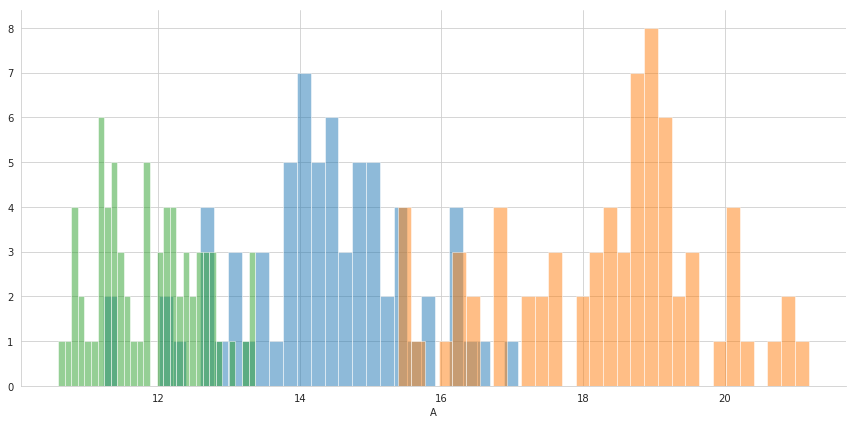

In [18]:
g = sns.FacetGrid(data = df , hue = "target" , size = 6 , aspect = 2)
g = g.map(plt.hist , "A" , bins = 30 , alpha = 0.5)

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [20]:
kmeans.fit(df.drop("target" , axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
centers = kmeans.cluster_centers_
centers

array([[11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944]])

In [23]:
df["klabels"] = kmeans.labels_
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target,klabels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,2


Text(0.5, 1.0, 'Original')

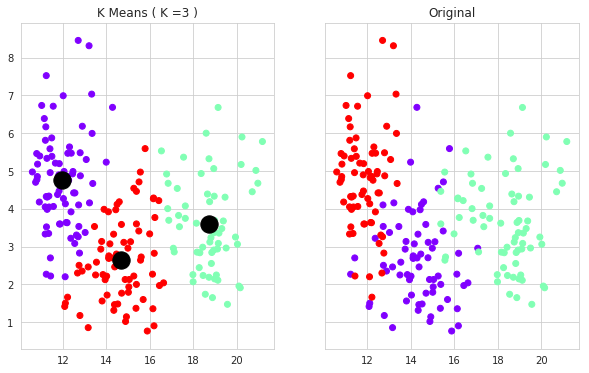

In [33]:
f , (ax1,ax2) = plt.subplots ( nrows = 1 , ncols = 2 , sharey = True , figsize =  (10 , 6))

ax1.scatter ( x = df["A"] , y = df["A_Coef"] , c = df [ "klabels"] , cmap = "rainbow") 
ax1.set_title ("K Means ( K =3 )")
ax1.scatter(x = centers[ : , 0] , y = centers[: , 5] , c ="black" , s = 300)


ax2.scatter ( x = df["A"] , y = df["A_Coef"] , c = df [ "target"] , cmap = "rainbow")
ax2.set_title ("Original")

In [35]:
sum_dist = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(df.drop ("target" , axis = 1))
    sum_dist[k] = kmeans.inertia_

In [36]:
sum_dist

{1: 2868.733362558905,
 2: 1147.6773582221927,
 3: 587.3186115940427,
 4: 482.7137071369965,
 5: 404.67287383994056,
 6: 342.7671316221936,
 7: 292.94659596635273,
 8: 259.75494806890515,
 9: 229.6923310286236}

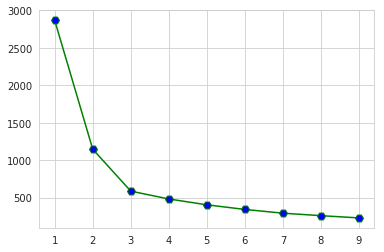

In [39]:
plt.plot(list(sum_dist.keys()),
        list(sum_dist.values()) , linestyle = "-" , color = "g" , marker = "H" , markerfacecolor = "b" , markersize = 8)